# SLU7 - Regression With Linear Regression: Exercise notebook

In this notebook you will practice the following:
     - Simple Linear Regression
     - Multiple Linear Regression
     - Closed Form Solution
     - Using scikit learn linear regression implementations
     - Gradient Descent


In [1]:
# Base imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## 1. Simple Linear Regression

In this section, you will use the linear regression to solve the simple problem you have seen in the learning notebooks. Let's start by loading the data we want to model and visualizing it:

In [2]:
df_lin = pd.read_csv('data/linear.csv')
df_lin.head()

,x,y
0,-1.209601,-0.101196
1,-5.539893,-15.397840
2,-5.221339,-11.760081
3,-2.664528,-7.911007
4,-2.951522,-3.838914


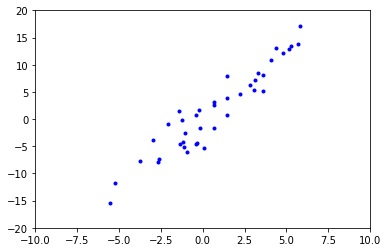

In [3]:
df_lin = df_lin.sort_values('x')
plt.xlim((-10, 10))
plt.ylim((-20, 20))
plt.plot(df_lin['x'], df_lin['y'], 'b.')

### 1.1 - Simple Linear Model

As you can see, our data has only one variable (x) and one label (y), so we can try to fit it with a simple linear regression. This model is represented by the following expression:

$$\hat{y} = \beta_0 + \beta_1 x$$

where $\hat{y}$ are the predictions, $\beta_0$ is the intercept, $\beta_1$ is the coefficient and $x$ is the input sample. Expanding to several samples, we can write this equation in a vector form:

$$\vec{\hat{y}} = \beta_0\vec{1} + \beta_1 \vec{x}$$

Implement this linear model below


In [4]:
def simple_linear_model(x, b):
    """
    Args:
        x : numpy.array with shape (num_samples,) - The input data 
        b: numpy.array with shape (2,) - The weights of the model [b_0, b_1]
    
    Returns:
        y_hat : numpy.array with shape (num_samples,) - The prediction made by 
                the simple linear regression.
    """
    
    b_0 = b[0]
    b_1 = b[1]
    y_hat =  b_0 + b_1*(x.T)
    # Notice that we had to make a transpose out of x
    return y_hat

Check that your solution is an approximate of the true solution for the following tests

In [5]:
np.testing.assert_array_almost_equal(
    simple_linear_model(np.arange(0, 10), np.array([-12, 30])), 
    np.array([-12.,  18.,  48.,  78., 108., 138., 168., 198., 228., 258.])
)

np.testing.assert_array_almost_equal(
    simple_linear_model(np.arange(-5, 5), np.array([1, 1])), 
    np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])
)

np.testing.assert_array_almost_equal(
    simple_linear_model(np.arange(-10, 10, 2), np.array([0.25, 2.1])), 
    np.array([-20.75, -16.55, -12.35, -8.15, -3.95, 0.25, 4.45, 8.65, 12.85, 17.05])
)

The first approach you can take is to implement the closed form solution. This is, solving the equation that minimizes the error accross all of the samples - ordinary least squares. For that, however, we need to understand what the error trying to be minimized is. Let's take a look at the error function you learned:

### 1.2 Summed Square Error

Start by implementing the error function presented - summed squared error:

$$J = \frac{1}{N} \sum_{n=1}^N e_i^2 = \frac{1}{N} \sum_{n=1}^N (y_i - \hat{y_i})^2$$

Where the error is the difference between your predictions and the actual sample value.

In [6]:
def summed_squared_error_function(y, y_predict):
    """
    Args: 
        y : numpy.array with shape (num_samples, ) - real target
        y_predict : numpy.array  with shape (num_samples, ) - predicted target
    
    Returns:
        error : float
    """
    # Compute the error
    e = ((y.T)-(y_predict.T))
    
    # Now, square the difference
    s = e**2 
    
    # Finally, take the mean and return the error
    m = s.sum()/len(y)
    return m

Check that your solution is an approximate of the true solution for the following tests:

In [8]:
# Simple tests
assert math.isclose(summed_squared_error_function(np.array([.3412]), np.array([.1231])), 0.04756761000000001)

assert math.isclose(summed_squared_error_function(np.array([3.1231]), np.array([4.1313])), 1.0164672400000008)


# Error in our dataset with random weights
x_rnd = df_lin['x'].values
y_rnd = df_lin['y'].values
beta_rnd = np.array([1., -1.])
y_hat_rnd = simple_linear_model(x_rnd, beta_rnd)

assert math.isclose(summed_squared_error_function(y_rnd, y_hat_rnd), 110.62795023298027)


As you can see from the previous test, picking just random values for our weights will probably yield very high error values. You can even visualize this to see that in fact these random weights don't fit our data:


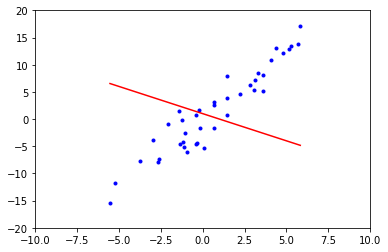

In [9]:
plt.xlim((-10, 10))
plt.ylim((-20, 20))
plt.plot(x_rnd, y_rnd, 'b.')
plt.plot(x_rnd, y_hat_rnd, 'r-')

### 1.3 - Closed Form Solution

Let's then implement a closed form solution. Remember the solution to minimize the error can be written as:

$$ \beta_1 = \frac{\sum_{i}^{N}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i}^{N}{(x_i - \bar{x})^2}} = \frac{cov(x, y)}{var(x)}$$

with cov(x,y) and var(x) are, respectively, the covariance and variance of the samples

$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$ 

where $\bar{y} = \frac{1}{N}\sum_{i}^{N}{y_i}$ and $\bar{x} = \frac{1}{N}\sum_{i}^{N}{x_i}$ are the means of the sample.

Complete the closed form solution below

In [10]:
def simple_closed_form_solution(x, y):
    """
    Args: 
        x : numpy.array with shape (num_samples, ) - input samples 
        y_predict : numpy.array with shape (num_samples, ) - sample labels
    
    Returns:
        betas: coefficient [beta_0, beta_1] as a numpy.array with shape (2, ) 
    """
    # The sample covariance and variance for 1-d arrays in 
    # numpy for this particular case are computed as follows
    # We covered this part so you don't lose too much time on these details
    cov_xy = np.cov(x, y, bias=True)[0][1]
    var_x = np.var(x)
    
    # Compute coefficient
    beta_1 = cov_xy/var_x 
    
    # Compute intersect
    beta_0 = y.mean() - beta_1*x.mean()
    
    # Now, return the coefficients (betas)
    return np.array([beta_0,beta_1])

Check that your solution is an approximate of the true solution for the following tests:

In [11]:
np.testing.assert_array_almost_equal(
    simple_closed_form_solution(np.arange(0, 10), np.arange(0, 20, 2)),
    np.array([0., 2.])
)

np.testing.assert_array_almost_equal(
    simple_closed_form_solution(np.arange(-2, 3), np.array([-1.25, -.5, .25, 1., 1.75])),
    np.array([.25, .75])
)


Now apply it to our dataset to get the best weights, and measure the error across the dataset:

In [12]:
x_cf = df_lin['x'].values
y_cf = df_lin['y'].values
beta_cf = simple_closed_form_solution(x_cf, y_cf)
y_hat_cf = simple_linear_model(x_cf, beta_cf)

assert math.isclose(summed_squared_error_function(y_cf, y_hat_cf), 5.8835039829278095)


You can also visualize how good your solution fits the given data:

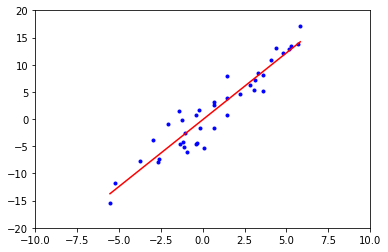

In [13]:
plt.xlim((-10, 10))
plt.ylim((-20, 20))
plt.plot(x_cf, y_cf, 'b.')
plt.plot(x_cf, y_hat_cf, 'r-')

## 2. Multiple Linear Regression

In this section, we will expand what we learned to a linear regression with multiple inputs - which we call features of our model. We will use a very specific scenario so we are able to visualize it better - we will try to model a polynomial function, in particular, a cubic function, which can be written as:

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^{2} + \beta_3 x^{3}$$

You will basically be considering each power of x as a different feature. To simplify, we already provide the dataset prepared with the powers we want for this, so let's load it to provide some context:



In [14]:
df_pln = pd.read_csv('data/polynomial.csv')
df_pln.head()

,x,x_2,x_3,y
0,-0.974682,0.950004,-0.925952,-1.138194
1,1.043495,1.088882,1.136242,1.116651
2,1.671416,2.793632,4.669321,1.591118
3,-0.051452,0.002647,-0.000136,1.001020
4,1.989017,3.956189,7.868928,-0.973300


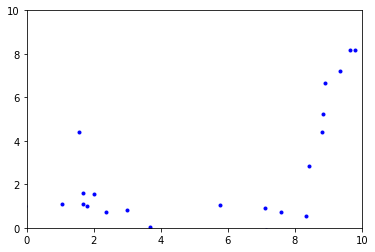

In [15]:
df_pln = df_pln.sort_values('x')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.plot(df_pln['x'], df_pln['y'], 'b.')

Although this model is non linear in its features, notice that it is linear with respect to the weigths, and the equation above can be rewritten as

$$\hat{y} = \beta_0 + \beta_1 x_0 + \beta_2 x_1 + \beta_3 x_2$$

where $[x_0, x_1, x_2]$ is our feature vector for a given sample.


#### 2.1  Linear Model Extended

The multiple linear regression problem is just the linear regression problem on a linear model with several inputs. This model can be represented by the following expressions:

$$\hat{y} = \beta_0 + \sum_{i=1}^K \beta_i x_i$$

We can also write it in matrix form to consider several samples, as before:

$$\vec{\hat{y}} = \beta_0\vec{1} + \vec{\beta_{1-k}}X^T$$

where X is now a matrix, containing all features for all samples: 

$$ X = \begin{bmatrix} 
x_1^1 & x_1^2 & ... & x_1^k \\
x_2^1 & x_2^2 & ... & x_2^k \\
... & ... & ... & ...\\
x_n^1 & x_n^2 & ... & x_n^k \\
\end{bmatrix} $$

If you go back to the closed form solution you implemented before, you might notice that we had already used matrix form, in particular to concatenate our whole weight vector. We'll follow the same logic, and extend our matrix X to allow a collumn of ones:

$$ X' = [\vec{1} | X] $$

and rewrite:

$$\vec{\hat{y}} = \vec{\beta}(X')^T$$

Implement below this extended model.

Tip: You might want to review the learning notebook and examples to get used to the matrix handling in the following problems

In [17]:
def extended_linear_model(x, betas):
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        betas : numpy.array with shape (num_features + 1,) - weights of 
                our model, with the intercept in the first position of 
                the array
    
    Returns:
        y_pred : numpy.array with shape (num_samples,) - prediction 
                made by the simple linear regression.
    """
    
    # We do the proper reshaping of weights so you don't have 
    # to worry about that and focus on the remaining logic
    betas = betas.reshape((1, -1))
    
    # Extend the matrix x with a collumn of ones
    ones = np.ones(len(x)).reshape((-1,1))
    new_x = np.concatenate((ones,x), axis = 1)

    # Compute the output of the linear model
    #Mutiplying a matrix by a vector matrix.dot(vector.T)
    y_pred = new_x.dot(betas.T)
    
    # Once again, we reshape your array to get the proper output
    return y_pred.flatten()

Since this is an extension of the simple linear model, it should be able to cover that use case also. Check that your solution still passes the test for the simple linear model:

In [18]:
# Same examples as in
np.testing.assert_array_almost_equal(
    extended_linear_model(np.arange(0, 10).reshape(-1, 1), np.array([-12, 30])), 
    np.array([-12.,  18.,  48.,  78., 108., 138., 168., 198., 228., 258.])
)

np.testing.assert_array_almost_equal(
    extended_linear_model(np.arange(-5, 5).reshape(-1, 1), np.array([1, 1])), 
    np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])
)

np.testing.assert_array_almost_equal(
    extended_linear_model(np.arange(-10, 10, 2).reshape(-1, 1), np.array([0.25, 2.1])), 
    np.array([-20.75, -16.55, -12.35, -8.15, -3.95, 0.25, 4.45, 8.65, 12.85, 17.05])
)

Now check your solution passes the tests for the extended version:

In [19]:
np.testing.assert_array_almost_equal(
    extended_linear_model(np.array([[1., 2.], [3., 4.], [5., 6.]]), np.array([-1., 0., 1.])), 
    np.array([1., 3., 5.])
)

np.testing.assert_array_almost_equal(
    extended_linear_model(np.ones((10, 2)), np.array([1., 2., 3.])), 
    np.array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])
)

### 2.2 - Summed Squared Error

As before, we can use the summed squared error as our cost. However, since this function does not receive anything other than the predictions and true values, there is no need to reimplement it. As before, let's see how the model would behave and what would be its error if we pick random weights:

Error: 333.2793729017984


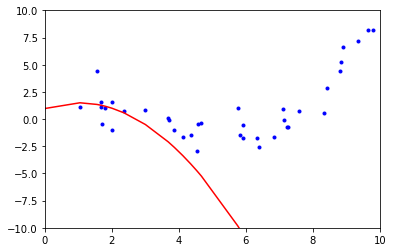

In [20]:
# Error in our dataset with random weights
x_pln_rnd = df_pln['x']
X_pln_rnd = df_pln.drop('y', axis=1).to_numpy()
y_pln_rnd = df_pln['y'].values
beta_pln_rnd = np.array([1., 1., -.5, 0.])
y_hat_pln_rnd = extended_linear_model(X_pln_rnd, beta_pln_rnd)

plt.xlim((0, 10))
plt.ylim((-10, 10))
plt.plot(x_pln_rnd, y_pln_rnd, 'b.')
plt.plot(x_pln_rnd, y_hat_pln_rnd, 'r-')

print('Error: {}'.format(summed_squared_error_function(y_pln_rnd, y_hat_pln_rnd))) 

As you can see, the solution is clearly not a fit, and the error is very high. So let's move into our closed form solution.

### 2.2 - Closed Form Solution

Let's now implement the closed form solution for the generic case. When put into matrix form, remember the solution to minimize the error can be written as:

$$ \vec{\beta} = (X^TX)^{-1}(X^T\vec{y})$$


Where X is our matrix of samples extended to add a 1 component in each sample, $X = [\vec{1} | X] $ , $\vec{y}$ is the output vector, and $\vec{\beta}$ the weight vector with weights $\beta_0$ and $\beta_1$

Implement the closed form solution for the multiple linear regression problem below

In [21]:
def extended_closed_form_solution(x, y):
    """
    Args: 
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples, ) - sample labels
    
    Returns:
        betas : numpy.array with shape (num_features + 1, ) - weight vector 
    """ 
    
    # Proper reshaping of the labels
    y = y.reshape((-1, 1))

    # Extend vector of samples with array of ones
    X_extended = np.ones(len(x)).reshape((-1,1))
    new_x = np.concatenate((X_extended,x), axis = 1)
    print(new_x.shape)
    print(new_x.T.shape)
    # Compute betas
    betas = np.linalg.inv(np.matmul(new_x.T,new_x)).dot((new_x.T).dot(y))
    # Once again, we reshape your array to get the proper output
    return betas.flatten()


Check that your solution is an approximate of the true solution for the following tests:

In [22]:
# Old tests
np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.arange(0, 10).reshape(10, 1), np.arange(0, 20, 2).reshape(10, 1)),
    np.array([0., 2.])
)

np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.arange(-2, 3).reshape(5, 1), np.array([-1.25, -.5, .25, 1., 1.75]).reshape(5, 1)),
    np.array([.25, .75])
)


# Extended test cases
np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.array([[1., -1.], [2., 1.], [3., -5.]]), np.array([0., 1., 0.])), 
    np.array([-0.25, 0.5, 0.25])
)


np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.array([[10., -2.], [-4., 5.], [-7., -8.]]), np.array([2., 1., -.5])), 
    np.array([1.019704, 0.115764, 0.08867])
)


(10, 2)
(2, 10)
(5, 2)
(2, 5)
(3, 3)
(3, 3)
(3, 3)
(3, 3)


Now apply it to our dataset to get the best weights, and measure the error across the dataset:

In [23]:
x_pln_cf = df_pln['x'].values
y_pln_cf = df_pln['y'].values

# All collumns except y
X_pln_cf = df_pln.drop('y', axis=1).to_numpy()

beta_pln_cf = extended_closed_form_solution(X_pln_cf, y_pln_cf)
y_hat_pln_cf = extended_linear_model(X_pln_cf, beta_pln_cf)

assert math.isclose(summed_squared_error_function(y_pln_cf, y_hat_pln_cf), 1.1570975215814507)

(40, 4)
(4, 40)


And finally we'll try to see how well this solution fits the data:

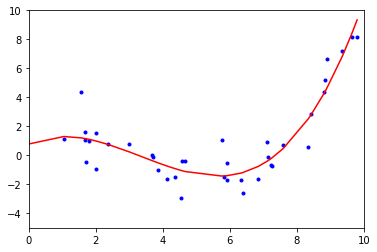

In [24]:
plt.xlim((0, 10))
plt.ylim((-5, 10))
plt.plot(x_pln_cf, y_pln_cf, 'b.')
plt.plot(x_pln_cf, y_hat_pln_cf, 'r-')

## 3  ScikitLearn Linear Regression

Although implementing the closed form solution and error functions is a good exercise, our implementation is still far from robust. Luckily, ScikitLearn already provides us with a solver for the Linear Regression problem, which implements a closed form solution internally. It also provides already some extra info on the regression, such as the $R^2$ score. 

For this exercise we'll be using the Boston housing dataset, and try to model the house pricing through the provided features. Start by loading and looking into the dataset:

In [25]:
data = pd.read_csv('data/boston (scaled).csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [26]:
# All features except house price
columns_housing = data.drop('MEDV', axis=1)
x_housing = columns_housing.to_numpy()

# House price 
y_housing = data['MEDV'].to_numpy()

Each of the collumns in the table is one of the features our model is going to use, this is, one of the inputs we are going to give it. Use the `sklearn.linear_model.LinearRegression` module that you've learned and implement it in the function below.

In [27]:
from sklearn.linear_model import LinearRegression
def sklearn_regression(x, y):
    """
    
    Args: 
        x: numpy.ndarray with shape (num_samples, num_features) - samples of our model
        y: numpy.array with shape (num_samples, ) - sample labels
        
    Return:
        coefs: numpy array with shape (num_features,) - coefficients vector
        intercept: numpy array with shape (1,) - intercept value
        score: float - R squared score of regression
    """
    # Fit the linear regressor
    lm = LinearRegression()
    lm.fit(x,y)
    
    # Extract the coefficients
    coefs = lm.coef_ 
    
    # Extract the coefficients
    intercept = lm.intercept_
    
    # 
    score = lm.score(x,y)

    return coefs, intercept, score

Let's see then what our coefficients are for each of the features.

In [28]:
coefs_housing, intercept_housing, score_housing = sklearn_regression(x_housing, y_housing)

print('Feature coefficients: ')
print(pd.Series(coefs_housing, columns_housing.columns))
print('\n')

print('Intercept: {}'.format(intercept_housing))
print('\n')

print('R² score: {}'.format(score_housing))

Feature coefficients: 
CRIM      -0.920411
ZN         1.080981
INDUS      0.142967
CHAS       0.682203
NOX       -2.060092
RM         2.670641
AGE        0.021121
DIS       -3.104448
RAD        2.658787
TAX       -2.075898
PTRATIO   -2.062156
B          0.856640
LSTAT     -3.748680
dtype: float64


Intercept: 22.532806324110684


R² score: 0.7406077428649428


Finally, check that your solution is an approximate of the true solution for the following tests:

In [29]:
betas_housing = np.concatenate((np.array([intercept_housing]), np.array(coefs_housing)), axis=0)

np.testing.assert_array_almost_equal(
    extended_linear_model(x_housing[:10], betas_housing),
    np.array([30.00821269, 25.0298606, 30.5702317, 28.60814055, 27.94288232, 
              25.25940048, 23.00433994, 19.5347558, 11.51696539, 18.91981483])
)

np.testing.assert_array_almost_equal(
    extended_linear_model(x_housing[-10:], betas_housing),
    np.array([14.01017244, 19.10825534, 21.29720741, 18.45524217, 20.46764235, 
              23.53261729, 22.37869798, 27.62934247, 26.12983844, 22.34870269])
)

y_hat_housing = extended_linear_model(x_housing, betas_housing)
assert math.isclose(summed_squared_error_function(y_housing, y_hat_housing), 21.8977792176875)


We can also use this model to get to the solution for our previous problems. Run the cells below and see the scikitlearn solution.

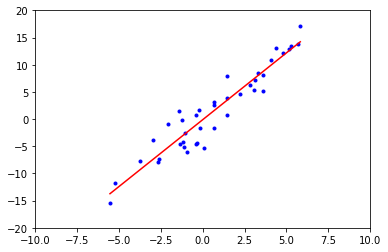

In [30]:
df_lin = pd.read_csv('data/linear.csv')
df_lin = df_lin.sort_values('x')
x_lin_skl = df_lin['x'].values.reshape(-1, 1)
y_lin_skl = df_lin['y'].values

coefs_lin, intercept_lin, _ = sklearn_regression(x_lin_skl, y_lin_skl)
betas_lin_skl = np.array([intercept_lin, coefs_lin[0]])
y_hat_lin_skl = extended_linear_model(x_lin_skl, betas_lin_skl)

plt.xlim((-10, 10))
plt.ylim((-20, 20))
plt.plot(x_lin_skl, y_lin_skl, 'b.')
plt.plot(x_lin_skl, y_hat_lin_skl, 'r-')

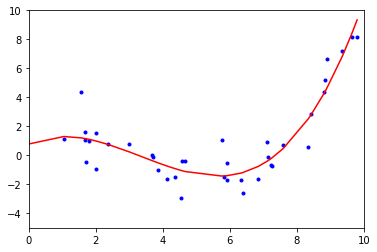

In [31]:
df_pln = pd.read_csv('data/polynomial.csv')
df_pln = df_pln.sort_values('x')
x_pln_skl = df_pln['x'].values.reshape(-1, 1)
y_pln_skl = df_pln['y'].values
X_pln_skl = df_pln.drop('y', axis=1).to_numpy()

coefs_pln, intercept_pln, _ = sklearn_regression(X_pln_skl, y_pln_skl)
betas_pln_skl = np.concatenate((np.array([intercept_pln]), np.array(coefs_pln)), axis=0)
y_hat_pln_skl = extended_linear_model(X_pln_skl, betas_pln_skl)

plt.xlim((0, 10))
plt.ylim((-5, 10))
plt.plot(x_pln_skl, y_pln_skl, 'b.')
plt.plot(x_pln_skl, y_hat_pln_skl, 'r-')

So now that you've seen the scikitlearn method in action, let's move on to a more generic method - the Gradient Descent!

## 4. Gradient Descent

Now we will see how to get to a similar solution through learning methods. In this section, you will implement gradient descent, an algorithm to iteratively update the weights according to the direction of the error.

This method is an iterative process that updates the weights in the direction that minimizes our error. For this it makes use of derivatives. The formula follows:

$$ \vec{\beta}_{i+1} = \vec{\beta}_i - \eta \Delta_\vec{\beta} J$$

where $\Delta_\vec{\beta}$ is a vector of the derivatives - also called gradients - of our error function with respect to the weights, $\beta_{i+1}$ is the updated weight and $\beta_{i}$ the current weight. We then need to be able to compute these gradients to be able to update the weights.


#### 4.1 Multiple Linear Regression partial derivatives

The vector $\Delta_\vec{\beta}$ in the formula above is just a vector with the partial derivatives of the error function with respect to each of the weights. The formulas for these partial derivatives with respect to each weigth are defined as follows:

$$\frac{\partial J}{\partial b_0} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$\frac{\partial J}{\partial b_1} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{1_n} $$

$$...$$

$$\frac{\partial J}{\partial b_K} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{K_n} $$

Since the focus of this notebook is for you to implement the methods to solve linear regression, and you already have quite some work, we'll solve this one for you. Check below the code for the derivatives:

In [ ]:
def linear_regression_partial_derivatives(x, y, y_hat):
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples,) - sample labels
        y_hat : numpy.array with shape (num_samples,) - predicted labels
    
    Returns:
        deltas : pandas.Series shape (num_features + 1,)
            
    """    

    # Compute the difference between the targets and the predictions.
    y_diff = y - y_hat
    
    # Initialize the numpy array of partial derivatives
    deltas = np.zeros((x.shape[1] + 1, ))
    
    # Compute the partial derivative for b0
    deltas[0] = -(2 * y_diff).mean()
    
    # Extract the partial derivatives of the remaining betas  
    for col in range(x.shape[1]): 
        deltas[col+1] = -((2 * y_diff) * x[:, col]).mean()
    
    # Return derivatives 
    return deltas

#### 4.2 Adjusting  parameters with gradient descent

Now we want to adjust the weights with the update rule we presented:

$$ \vec{\beta}_{i+1} = \vec{\beta}_i - \eta \Delta_\vec{\beta} J$$

where $\eta$ is our learning rate - how fast we want to move in the direction of the gradient. We will be implementing the standard gradient descent, also know as batch gradient descent, where for each iteration we will compute the derivatives by taking in all the dataset:

1. _For epoch in 1...epochs:
    1. Predict the outputs with current weights $\hat{y} = \vec{\beta}_i X$
    2. $\Delta_{\beta_0} = \frac{1}{N} \sum_{n=1}^N 2 (y - \hat{y})$
    3. $\Delta_{\beta_{i=1...N}} = \frac{1}{N} \sum_{n=1}^N 2 (y - \hat{y})x_{i_n} $
    4. $\beta_i = \beta_i - \eta \Delta_{\beta_i}$

Notice that you can get the gradients in steps 1 and 2 with the function implemented above. 

The number of epochs and learning rate will impact how fast and how good the solution we converge to. Besides the number of epochs there are more clever ways of knowing when to stop this procedure, but for simplicity, we will only use this one here.

Implement this gradient descent function below:

In [34]:
def linear_regression_gradient_descent(x, y, betas, learning_rate, epochs): 
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples,)  - sample labels
        betas : numpy.array with shape (num_features + 1,) - initial weights
        learning_rate : float - factor that will define the size of update step
        epochs : int - number of times to run full dataset

    Returns:
        betas : numpy.array with shape (num_features + 1,) - final weights after algorithm
            
    """    

    for epoch in range(epochs): 

        # Compute estimates for this iteration
        X_extended = np.ones(len(x)).reshape((-1,1))
        new_x = np.concatenate((X_extended,x), axis = 1)
        y_hat = betas.dot(new_x.T)

        # Compute the partial derivatives of the error function 
        # (hint: check linear_regression_partial_derivatives)
        deltas = linear_regression_partial_derivatives(x, y, y_hat)

        # Update betas with Gradient Descent rule 
        betas = betas - learning_rate*deltas
        
    return betas       

Check that your solution is an approximate of the true solution for the following tests:

In [35]:
np.random.seed(42)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 10

betas_ = linear_regression_gradient_descent(x_housing, y_housing, betas, learning_rate, epochs)
np.testing.assert_array_almost_equal(
    betas_, 
    np.array([
        20.1536, -0.391 ,  0.7281, -0.1594,  0.9096, -0.4351,  3.3176,
        0.2957, -0.9711,  0.5549, -0.8421, -1.4982,  1.0387, -3.0292]), 
    decimal=4)


np.random.seed(84)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 1

betas_ = linear_regression_gradient_descent(x_housing, y_housing, betas, learning_rate, epochs)
np.testing.assert_array_almost_equal(
    betas_, 
    np.array([ 4.5434, -0.4652,  0.9789, -0.4454,  1.1187, -0.7988,  1.5215,
       -0.581 ,  0.9902, -0.7336, -0.745 , -0.5769,  1.5129, -1.1906]), 
    decimal=4)

Finally, run the SGD for the housing problem, and compare the coefficients with the ones from the previous closed form solution:

In [36]:
np.random.seed(42)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 200

betas_ = linear_regression_gradient_descent(x_housing, y_housing, betas, learning_rate, epochs)

intercept_housing_sgd = betas_[0]
coefs_housing_sgd = betas_[1:]

series_sgd = pd.Series(coefs_housing_sgd, columns_housing.columns, name='SGD')
series_ols = pd.Series(coefs_housing, columns_housing.columns, name='OLS')

print('Feature coefficients: ')
print(pd.concat([series_sgd, series_ols], axis=1))
print('\n')

print('Intercept SGD: {}'.format(intercept_housing_sgd))
print('\n')

print('Intercept OLS: {}'.format(intercept_housing))
print('\n')

Feature coefficients: 
              SGD       OLS
CRIM    -0.910210 -0.920411
ZN       1.063046  1.080981
INDUS    0.088910  0.142967
CHAS     0.689895  0.682203
NOX     -2.047994 -2.060092
RM       2.681020  2.670641
AGE      0.012482  0.021121
DIS     -3.106294 -3.104448
RAD      2.522216  2.658787
TAX     -1.921710 -2.075898
PTRATIO -2.056564 -2.062156
B        0.855731  0.856640
LSTAT   -3.743365 -3.748680


Intercept SGD: 22.532806324110677


Intercept OLS: 22.532806324110684


